# Data Cleaning and EDA

## Begin by importing necessary libraries and the data set

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [98]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Data Cleaning


## Explore the data. Deal with null values and 'types' of data

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [100]:
df.sqft_basement.unique() #sqft basement should not be an object. 
# Here I explore the unique values and replace the '?' with 0, and change the datatype from object to float

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [101]:
df.sqft_basement=df.sqft_basement.replace('?', 0)

In [102]:
df.sqft_basement = df.sqft_basement.astype(float)

In [103]:
df.sqft_basement.unique()

array([   0.,  400.,  910., 1530.,  730., 1700.,  300.,  970.,  760.,
        720.,  700.,  820.,  780.,  790.,  330., 1620.,  360.,  588.,
       1510.,  410.,  990.,  600.,  560.,  550., 1000., 1600.,  500.,
       1040.,  880., 1010.,  240.,  265.,  290.,  800.,  540.,  710.,
        840.,  380.,  770.,  480.,  570., 1490.,  620., 1250., 1270.,
        120.,  650.,  180., 1130.,  450., 1640., 1460., 1020., 1030.,
        750.,  640., 1070.,  490., 1310.,  630., 2000.,  390.,  430.,
        850.,  210., 1430., 1950.,  440.,  220., 1160.,  860.,  580.,
       2060., 1820., 1180.,  200., 1150., 1200.,  680.,  530., 1450.,
       1170., 1080.,  960.,  280.,  870., 1100.,  460., 1400.,  660.,
       1220.,  900.,  420., 1580., 1380.,  475.,  690.,  270.,  350.,
        935., 1370.,  980., 1470.,  160.,  950.,   50.,  740., 1780.,
       1900.,  340.,  470.,  370.,  140., 1760.,  130.,  520.,  890.,
       1110.,  150., 1720.,  810.,  190., 1290.,  670., 1800., 1120.,
       1810.,   60.,

In [104]:
df.isna().sum() #Here I check what other columns have null values. 
#I replace the null values with either 'unknown' or 0 depending on the context

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [105]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [106]:
df.waterfront.fillna('unknown', inplace = True)

In [107]:
df.waterfront.unique()

array(['unknown', 0.0, 1.0], dtype=object)

In [108]:
df.view.unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [109]:
df.view.fillna('unknown', inplace = True)

In [110]:
df.view.unique()

array([0.0, 'unknown', 3.0, 4.0, 2.0, 1.0], dtype=object)

In [111]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [112]:
df.yr_renovated = df.yr_renovated.fillna(0.)

In [113]:
df.loc[df['sqft_basement'] == 0, 'basement'] = 0
df.loc[df['sqft_basement'] > 0, 'basement'] = 1


In [114]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,unknown,0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null object
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
basement         21597 non-null float64
dtypes: float64(8), int64(11), objec

In [116]:
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [117]:
df.to_csv('Cleaned_data.csv')

# Begin EDA

Now that the data is mostly cleaned I begin my exploritory data analysis. 
I want to know;
1) What variables may have a linear relationship to price?
2) Is there any Multicollinearity I need to be aware of?
3) How normally distributed are my datasets?

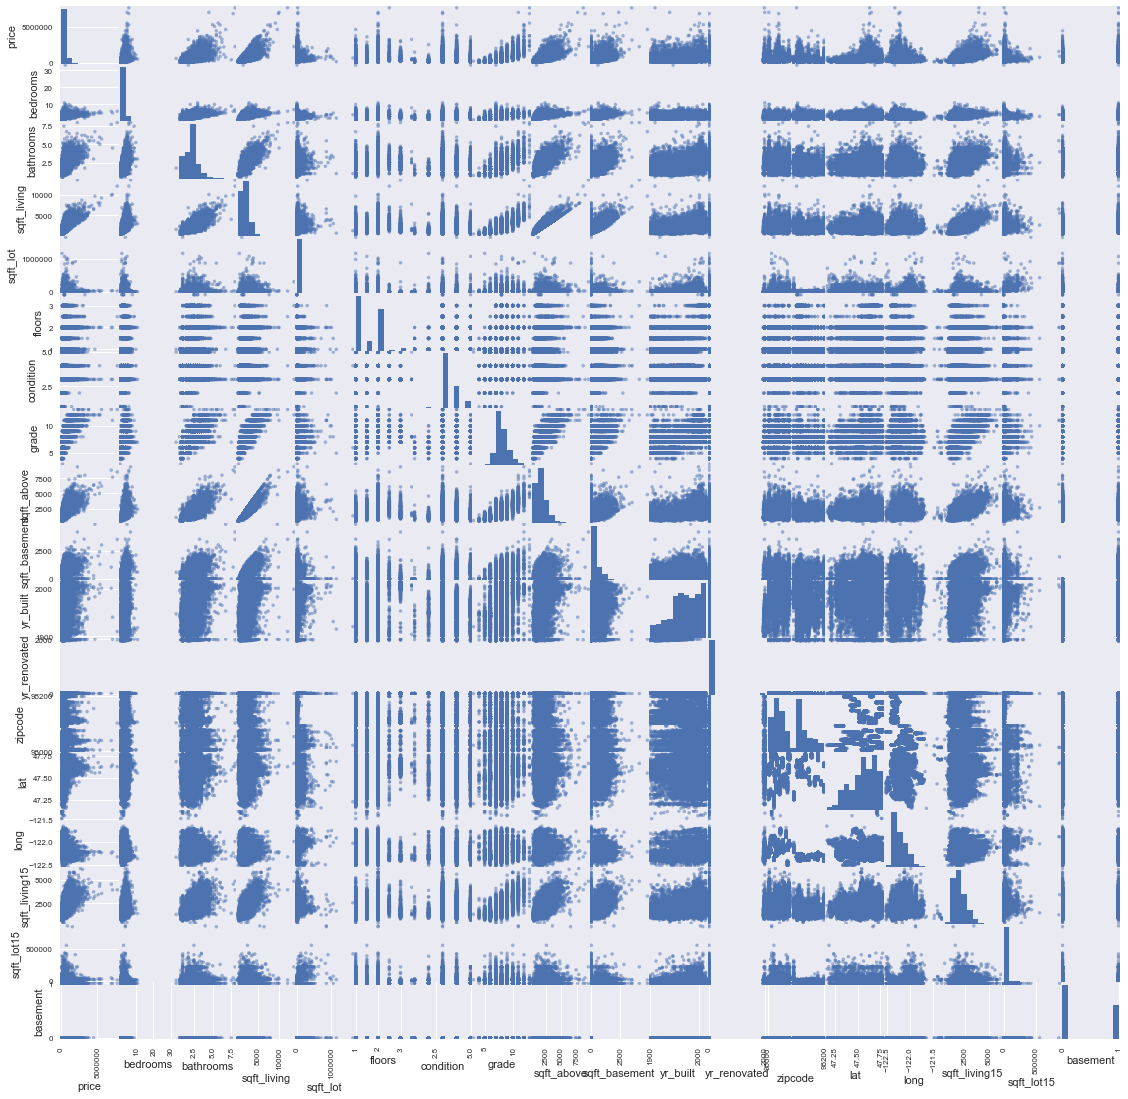

In [118]:
df0 = df.iloc[:,2:]
pd.plotting.scatter_matrix(df0,figsize  = [19, 19]);
plt.show()
#This plot gives me a lot of information. I can see which variables, with price on the y axis, may have linear relationships with price. 
#I can also look on the diagonal and see histograms showing the distribution for each of the variables.
#I can see that variables like grade are very close to normally distributed
#Price, bedrooms, bathrooms, sqft_living all look to be right skewed
#On initial look, the variables with potential linear relationships with price are, bedrooms, bathrooms, sqft_above, sqft_living, sqft_living15, grade


Now I want to explore multicollinearity amongst the variables without price. 

In [119]:
df1 = df.iloc[:,3:]
df1

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
0,3,1.00,1180,5650,1.0,unknown,0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,0.0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,0.0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,0.0
21595,3,2.50,1600,2388,2.0,unknown,0,3,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,0.0


In [120]:
abs(df1.corr()) > 0.75 #I plot a correlation plot where any values with higher than .75 correlation will be marked as true. 

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,basement
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False
sqft_basement,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True
yr_built,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [121]:
#create a new table using stack to create columns of the values and the correlation between the two columns
df2=df1.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df2

,level_0,level_1,0
0,bedrooms,bedrooms,1.000000
18,bathrooms,bathrooms,1.000000
270,sqft_lot15,sqft_lot15,1.000000
252,sqft_living15,sqft_living15,1.000000
234,long,long,1.000000
...,...,...,...
96,condition,zipcode,0.002888
211,lat,sqft_above,0.001199
131,sqft_above,lat,0.001199
248,sqft_living15,yr_renovated,0.000683


In [122]:
#create a new column called 'pairs' that ultimately combines the first two columns into one descriptive column
df2['pairs'] = list(zip(df2.level_0, df2.level_1))
df2

,level_0,level_1,0,pairs
0,bedrooms,bedrooms,1.000000,"(bedrooms, bedrooms)"
18,bathrooms,bathrooms,1.000000,"(bathrooms, bathrooms)"
270,sqft_lot15,sqft_lot15,1.000000,"(sqft_lot15, sqft_lot15)"
252,sqft_living15,sqft_living15,1.000000,"(sqft_living15, sqft_living15)"
234,long,long,1.000000,"(long, long)"
...,...,...,...,...
96,condition,zipcode,0.002888,"(condition, zipcode)"
211,lat,sqft_above,0.001199,"(lat, sqft_above)"
131,sqft_above,lat,0.001199,"(sqft_above, lat)"
248,sqft_living15,yr_renovated,0.000683,"(sqft_living15, yr_renovated)"


In [123]:

#set the index to pairs
df2.set_index(['pairs'], inplace = True)

#drop level columns
df2.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df2.columns = ['cc']

# drop duplicates.
df2.drop_duplicates(inplace=True)

In [124]:
df2[(df2.cc>.75) & (df2.cc <1)] #Now we can see which pairs are the most correlated
#It looks like sqft_living, sqft_above, and grade are the most correlated. 

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(basement, sqft_basement)",0.820893
"(sqft_living, grade)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


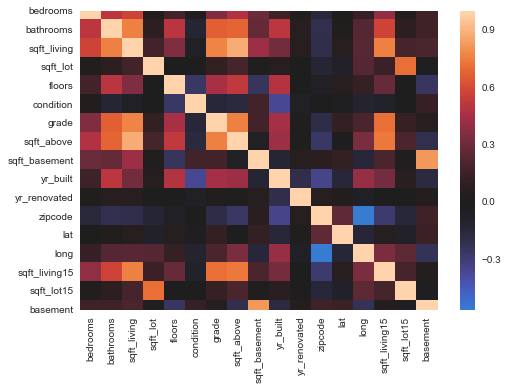

In [125]:
sns.heatmap(df1.corr(), center=0); #This heatmap also gives a visual as to the most correlated pairs. 
#Lighter colors are more correlated

Now I want to look more deaply into which variables have a linear relationship with price

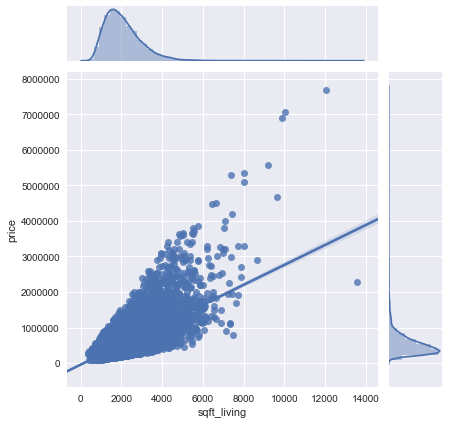

In [126]:
sns.jointplot('sqft_living','price', data=df, kind='reg');

#It looks like sqft_living does have a potential linear relationship
#The distribution of sqft_living, as shown on the top graph, also looks right skewed

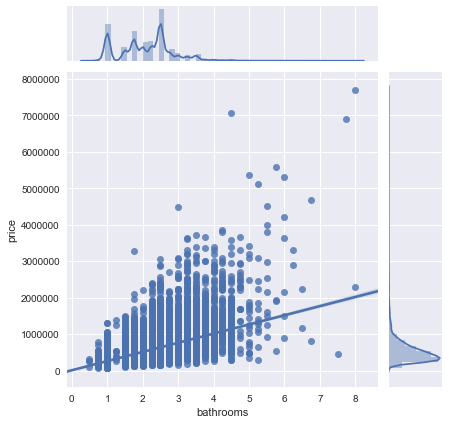

In [127]:
sns.jointplot('bathrooms','price', data=df, kind='reg');
#Bathrooms seem to have a potential linear relationship
#However the distribution of the data does not apear normal

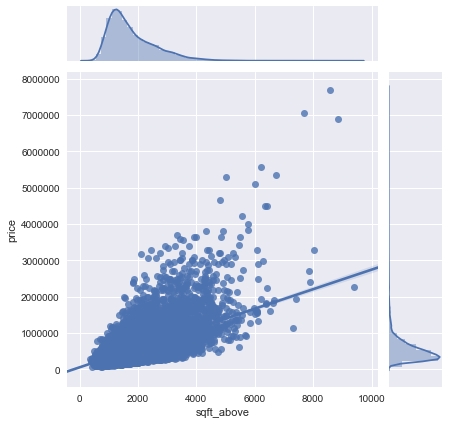

In [128]:
sns.jointplot('sqft_above','price', data=df, kind='reg');
#Sqft_above may have a linear relationship
#The data is skewed to the right

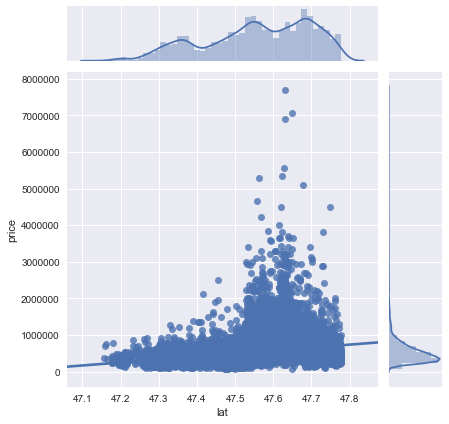

In [129]:
sns.jointplot('lat','price', data=df, kind='reg');
#There may be a slight negative linear relationship between lat and price but it doesn't look very strong
#The data is also not normally distributed

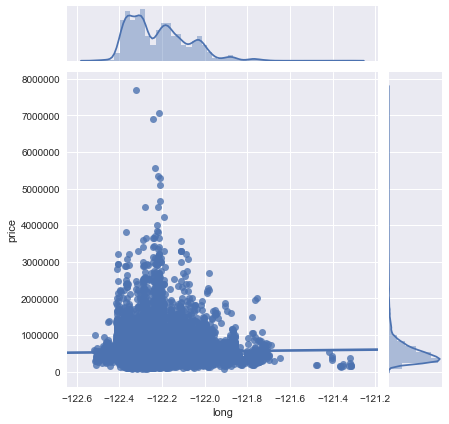

In [130]:
sns.jointplot('long','price', data=df, kind='reg');
#There looks to be even less of a linear relationship with longitude
#The data looks mostly skewed to the right and not normal

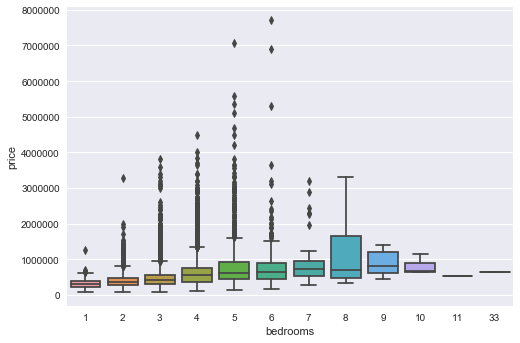

In [131]:
sns.boxplot(x = 'bedrooms', y = 'price', data=df);
#Bedrooms may have a linear relationship 


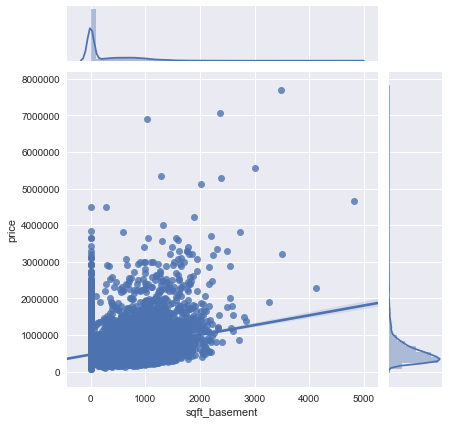

In [132]:
sns.jointplot('sqft_basement','price', data=df, kind='reg');
#There may be a slight linear relationship with sqft_basement, but the data is skewed to the right from all the unknown, or 0, values

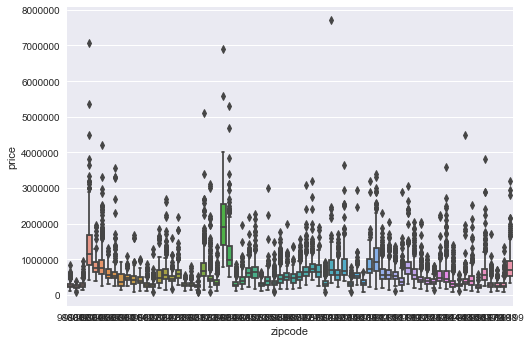

In [133]:
sns.boxplot(x = 'zipcode', y = 'price', data=df);
#Some zipcodes may have a relationship with price

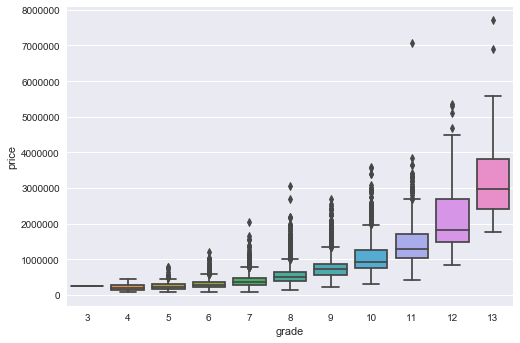

In [134]:
sns.boxplot(x = 'grade', y ='price', data=df);
#grade does seem to have a relationship with price

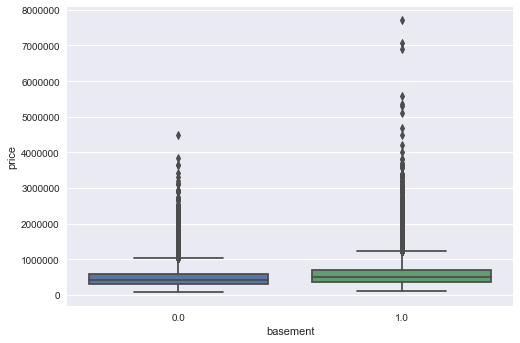

In [135]:
sns.boxplot(x = 'basement', y ='price', data=df);
#Having a basement may have a relationship with price